### Import the following libraries

In [14]:
import time
import numpy as np
import pandas as pd
import csv
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn import metrics
import sklearn.neighbors
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.manifold import TSNE

### Load data

In [30]:
X_train = pd.read_csv('data/X_train.csv') #data is already normalized
Y_train = pd.read_csv('data/y_train.csv')
X_test = pd.read_csv('data/X_test.csv')
Y_test = pd.read_csv('data/y_test.csv')
X_train.head()

0    1         2         3         4         5    6         7  \
0  0.002083  0.0  0.258248  0.262397  0.000000  0.000000  0.0  0.000000   
1  0.134939  0.0  0.231207  0.344823  0.000000  0.000000  0.0  0.224139   
2  0.001873  0.0  0.258521  0.262256  0.000000  0.000000  0.0  0.000000   
3  0.278345  0.0  0.205999  0.000000  0.000000  0.299004  0.0  0.000000   
4  0.006255  0.0  0.044390  0.361727  0.367046  0.000000  0.0  0.043246   

          8         9  ...        15   16        17        18        19  \
0  0.258232  0.002259  ...  0.260315  0.0  0.256150  0.002083  0.000093   
1  0.187477  0.000843  ...  0.237693  0.0  0.183378  0.048082  0.104377   
2  0.258510  0.002032  ...  0.260383  0.0  0.256636  0.001873  0.000155   
3  0.004397  0.000000  ...  0.299004  0.0  0.274152  0.013715  0.010117   
4  0.039719  0.009329  ...  0.045393  0.0  0.037572  0.005312  0.315459   

         20        21        22        23        24  
0  0.002343  0.262397  0.002259  0.000781  0.002083  
1  0.003348  0.344823  0.000843  0.003348  0.003348  
2  0.002107  0.262256  0.002032  0.000702  0.001873  
3  0.010443  0.299004  0.010117  0.001099  0.004397  
4  0.009398  0.361727  0.009329  0.000355  0.001419  

[5 rows x 25 columns]

In [31]:
Y_train=Y_train['0'].tolist()
Y_test=Y_test['0'].tolist()
Y_train[0:9] # there are 7 classes: "benign","allaple", "skeeyah","virlock","virut","vundo","zbot"

['virlock',
 'zbot',
 'virlock',
 'zbot',
 'benign',
 'virut',
 'vundo',
 'vundo',
 'skeeyah']

In [32]:
#transform labels to numeric values (some classifier requires that)
def stringLabelsToNumLabels(labels):
    for i in range(0,len(labels)):
        if labels[i]=="benign":
            labels[i]=int(0)
        if labels[i]=="allaple":
            labels[i]=int(1)
        if labels[i]=="skeeyah":
            labels[i]=int(2)
        if labels[i]=="virlock":
            labels[i]=int(3)
        if labels[i]=="virut":
            labels[i]=int(4)
        if labels[i]=="vundo":
            labels[i]=int(5)
        if labels[i]=="zbot":
            labels[i]=int(6)
    return labels    

Y_train = stringLabelsToNumLabels(Y_train)
Y_test = stringLabelsToNumLabels(Y_test)
Y_train[0:9]

[3, 6, 3, 6, 0, 4, 5, 5, 2]

In [20]:
print("Training set: ",np.shape(X_train)) #displays a number of feature vectors and its dimension
print("Testing set: ",np.shape(X_test))

Training set:  (9380, 25)
Testing set:  (4620, 25)


### Data normalization

In [6]:
%%time
# our data is already normalized
# data_norm = preprocessing.normalize(X_train, norm='l2')  #our data are already normalized
# data_norm[1]

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.63 µs


### k-nearest neighbors classifier

In [21]:
%%time
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 3,n_jobs=-1)
knn.fit(X_train.values, Y_train)
Y_pred = knn.predict(X_test.values)
confusion_matrix=sklearn.metrics.confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)
err=1-sklearn.metrics.accuracy_score(Y_test, Y_pred)
print('')
print('ERR = %.4f' % err)
print('')
print('--------------------------------------')
print('')
print(metrics.classification_report(Y_test, Y_pred,digits=4))
print('')
print('--------------------------------------')
print('')

[[667   3   1   0   7   0   2]
 [  0 607   0   2   8  10  33]
 [  0   5 656   0   0   3   1]
 [  0   1   0 655   1   1   0]
 [  5  17   0   0 643   3   4]
 [  3   5   0   0   0 633  13]
 [  9  30   2   1   8  13 568]]

ERR = 0.0413

--------------------------------------

              precision    recall  f1-score   support

     allaple     0.9751    0.9809    0.9780       680
      benign     0.9087    0.9197    0.9142       660
     skeeyah     0.9954    0.9865    0.9909       665
     virlock     0.9954    0.9954    0.9954       658
       virut     0.9640    0.9568    0.9604       672
       vundo     0.9548    0.9679    0.9613       654
        zbot     0.9147    0.9002    0.9073       631

    accuracy                         0.9587      4620
   macro avg     0.9583    0.9582    0.9582      4620
weighted avg     0.9587    0.9587    0.9587      4620


--------------------------------------

CPU times: user 1.34 s, sys: 3.51 ms, total: 1.34 s
Wall time: 341 ms


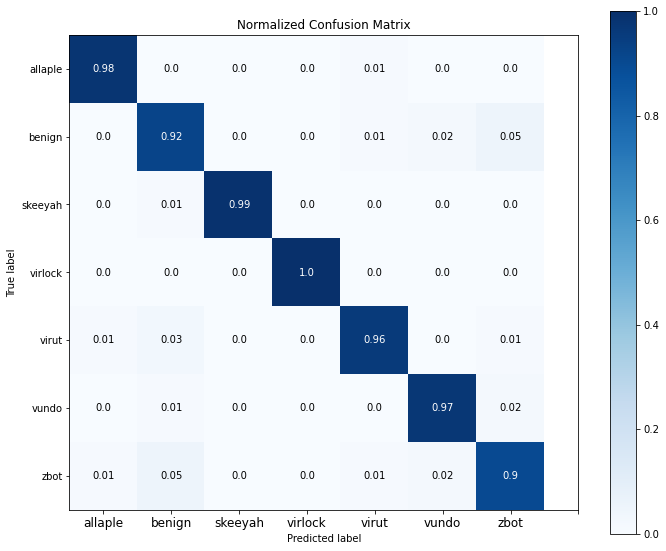

In [22]:
np.set_printoptions(precision=3)
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, figsize=(10,8), normalize=True)
plt.xticks(np.arange(0, 8, step=1),fontsize=12)

plt.tight_layout()
#plt.savefig('confMatrixForAllFamilies.eps',format='eps')
plt.show()

In [23]:
%time
k_list=[1,3,5,7,9,11,13,15,17,19,21]
acc_list = []
for k in k_list:
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = k,n_jobs=-1)
    knn.fit(X_train.values, Y_train)
    Y_pred = knn.predict(X_test.values)
    acc_list.append(sklearn.metrics.accuracy_score(Y_test, Y_pred))


#plot the relationship between k and the testing accuracy
plt.title('k-NN Varying number of neighbors')
plt.plot(k_list,acc_list)
plt.xlabel('Number of neighbors')
plt.ylabel('Testing accuracy')    

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


Text(0, 0.5, 'Testing accuracy')

### Naive Bayes (Gaussian) :

In [24]:
%%time
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train.values, Y_train)
Y_pred = clf.predict(X_test.values)
confusion_matrix=sklearn.metrics.confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)
err=1-sklearn.metrics.accuracy_score(Y_test, Y_pred)
print('ERR = %.4f' % err)
print('')
print('--------------------------------------')
print('')
print(metrics.classification_report(Y_test, Y_pred,digits=4))

[[625   5   1   0  15  32   2]
 [  2 476   6   0  23  85  68]
 [  0  11 506   0   0 147   1]
 [  0   1   8 639   4   5   1]
 [ 17  10  24   0 601  16   4]
 [ 13   5   0   0   2 627   7]
 [  1  39  29   2  10 244 306]]
ERR = 0.1818

--------------------------------------

              precision    recall  f1-score   support

     allaple     0.9498    0.9191    0.9342       680
      benign     0.8702    0.7212    0.7887       660
     skeeyah     0.8815    0.7609    0.8168       665
     virlock     0.9969    0.9711    0.9838       658
       virut     0.9176    0.8943    0.9058       672
       vundo     0.5424    0.9587    0.6928       654
        zbot     0.7866    0.4849    0.6000       631

    accuracy                         0.8182      4620
   macro avg     0.8493    0.8158    0.8175      4620
weighted avg     0.8507    0.8182    0.8196      4620

CPU times: user 75.8 ms, sys: 0 ns, total: 75.8 ms
Wall time: 73.6 ms


### Decision tree:

In [25]:
%%time
clf = DecisionTreeClassifier()
clf.fit(X_train.values, Y_train)
Y_pred = clf.predict(X_test.values)
confusion_matrix=sklearn.metrics.confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)
err=1-sklearn.metrics.accuracy_score(Y_test, Y_pred)
print('ERR = %.4f' % err)
print('')
print('--------------------------------------')
print('')
print(metrics.classification_report(Y_test, Y_pred,digits=4))

[[660   5   1   0   9   2   3]
 [  5 587   2   1  14  12  39]
 [  0   3 658   0   0   1   3]
 [  0   2   0 654   0   0   2]
 [  2  14   2   2 641   5   6]
 [  1   5   1   0   1 637   9]
 [  4  29   4   1  12  15 566]]
ERR = 0.0470

--------------------------------------

              precision    recall  f1-score   support

     allaple     0.9821    0.9706    0.9763       680
      benign     0.9101    0.8894    0.8996       660
     skeeyah     0.9850    0.9895    0.9872       665
     virlock     0.9939    0.9939    0.9939       658
       virut     0.9468    0.9539    0.9503       672
       vundo     0.9479    0.9740    0.9608       654
        zbot     0.9013    0.8970    0.8991       631

    accuracy                         0.9530      4620
   macro avg     0.9525    0.9526    0.9525      4620
weighted avg     0.9529    0.9530    0.9529      4620

CPU times: user 195 ms, sys: 3.41 ms, total: 198 ms
Wall time: 197 ms


### Deep neural network:

In [19]:
%%time
from sklearn.neural_network import MLPClassifier
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(400, 200, 2), random_state=1)
#clf = MLPClassifier(hidden_layer_sizes=(200,100,2), max_iter=300,activation = 'relu',solver='adam',random_state=1)
clf = MLPClassifier(hidden_layer_sizes=(200,100), max_iter=300,activation = 'relu',solver='adam',random_state=1)
clf.fit(X_train.values, Y_train)
Y_pred = clf.predict(X_test.values)
confusion_matrix=sklearn.metrics.confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)
err=1-sklearn.metrics.accuracy_score(Y_test, Y_pred)
print('ERR = %.4f' % err)
print('')
print('--------------------------------------')
print('')
print(metrics.classification_report(Y_test, Y_pred,digits=4))

[[618   2   3   1   5   8  23]
 [  2 664   0   0   6   1   7]
 [  6   0 656   0   0   2   1]
 [  2   0   0 654   0   1   1]
 [ 10   2   0   0 652   4   4]
 [  7   1   0   0   2 636   8]
 [ 35   1   0   2   8   7 578]]
ERR = 0.0351

--------------------------------------

              precision    recall  f1-score   support

           0     0.9088    0.9364    0.9224       660
           1     0.9910    0.9765    0.9837       680
           2     0.9954    0.9865    0.9909       665
           3     0.9954    0.9939    0.9947       658
           4     0.9688    0.9702    0.9695       672
           5     0.9651    0.9725    0.9688       654
           6     0.9293    0.9160    0.9226       631

    accuracy                         0.9649      4620
   macro avg     0.9648    0.9646    0.9647      4620
weighted avg     0.9652    0.9649    0.9650      4620

CPU times: user 5min 14s, sys: 4min 32s, total: 9min 46s
Wall time: 1min 21s


### Graphical representation

In [33]:
def plot_tsne(X, y, colormap=plt.cm.Paired):
    plt.figure(figsize=(8, 6))

    # clean the figure
    plt.clf()

    tsne = TSNE()
    X_embedded = tsne.fit_transform(X)
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap=colormap)
    
    plt.xticks(())
    plt.yticks(())

    plt.show()

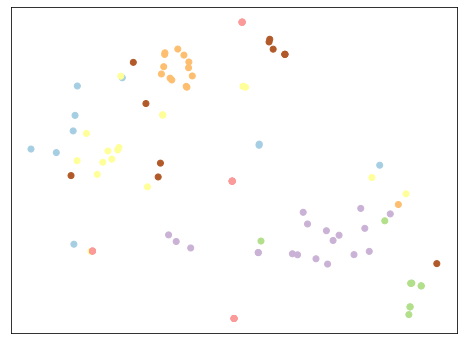

CPU times: user 5.03 s, sys: 16.3 ms, total: 5.04 s
Wall time: 715 ms


In [34]:
%%time
import warnings
warnings.filterwarnings('ignore')
plot_tsne(X_train[:100], Y_train[:100])